In [70]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")
df_sample = pd.read_csv("../datasets/sampleSubmission.csv")

In [86]:
df_train["Dates"] = pd.to_datetime(df_train["Dates"])

In [87]:
df_train["Hour"] = df_train["Dates"].apply(lambda x: x.hour)
df_train["Month"] = df_train["Dates"].apply(lambda x: x.month)
df_train["Year"] = df_train["Dates"].apply(lambda x: x.year)

In [115]:
df_train["Address"].unique()

array(['OAK ST / LAGUNA ST', 'VANNESS AV / GREENWICH ST',
       '1500 Block of LOMBARD ST', ..., '300 Block of JOHN F KENNEDY DR',
       'FOLSOM ST / ZENO PL', '1000 Block of 22ND AV'], dtype=object)

In [6]:
# others 탐색...
df_train[df_train["Category"] == "OTHER OFFENSES"]["Descript"].value_counts().head(20)

DRIVERS LICENSE, SUSPENDED OR REVOKED                    26839
TRAFFIC VIOLATION                                        16471
RESISTING ARREST                                          8983
MISCELLANEOUS INVESTIGATION                               8389
PROBATION VIOLATION                                       8016
LOST/STOLEN LICENSE PLATE                                 6424
VIOLATION OF RESTRAINING ORDER                            5816
PAROLE VIOLATION                                          5119
TRAFFIC VIOLATION ARREST                                  5051
CONSPIRACY                                                3114
OBSCENE PHONE CALLS(S)                                    2492
FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY            2339
VIOLATION OF MUNICIPAL CODE                               2308
HARASSING PHONE CALLS                                     2194
POSSESSION OF BURGLARY TOOLS                              2085
VIOLATION OF MUNICIPAL POLICE CODE                     

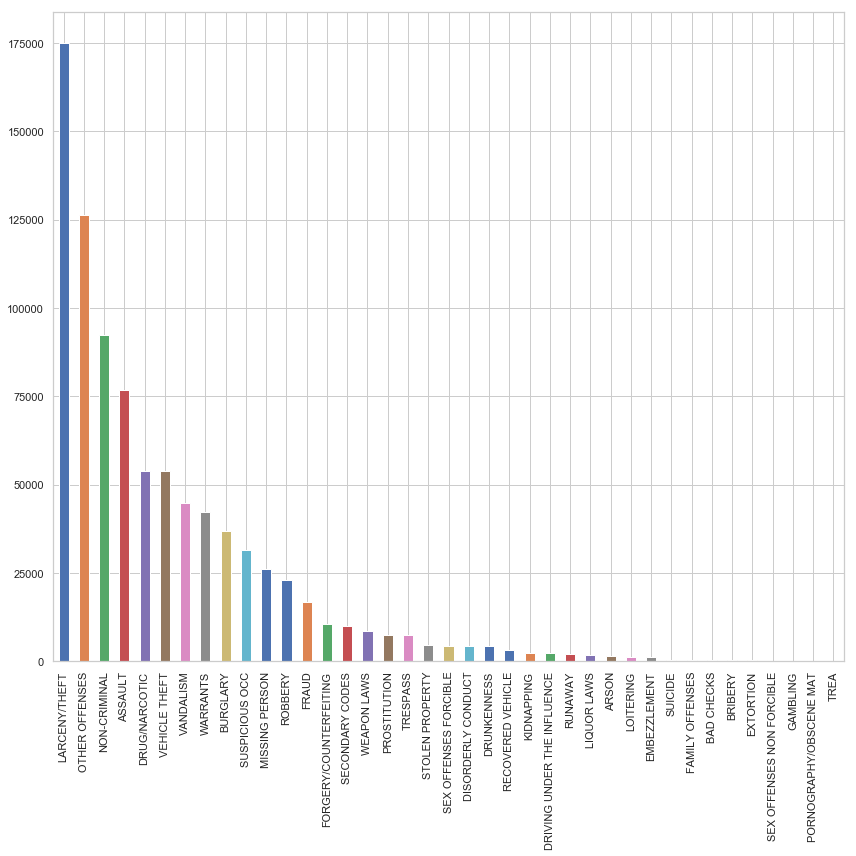

In [7]:
# 분류 절대수 순위...
fig, ax  = plt.subplots(figsize=(12, 12))
df_train["Category"].value_counts().plot('bar')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(37.7, 37.83)

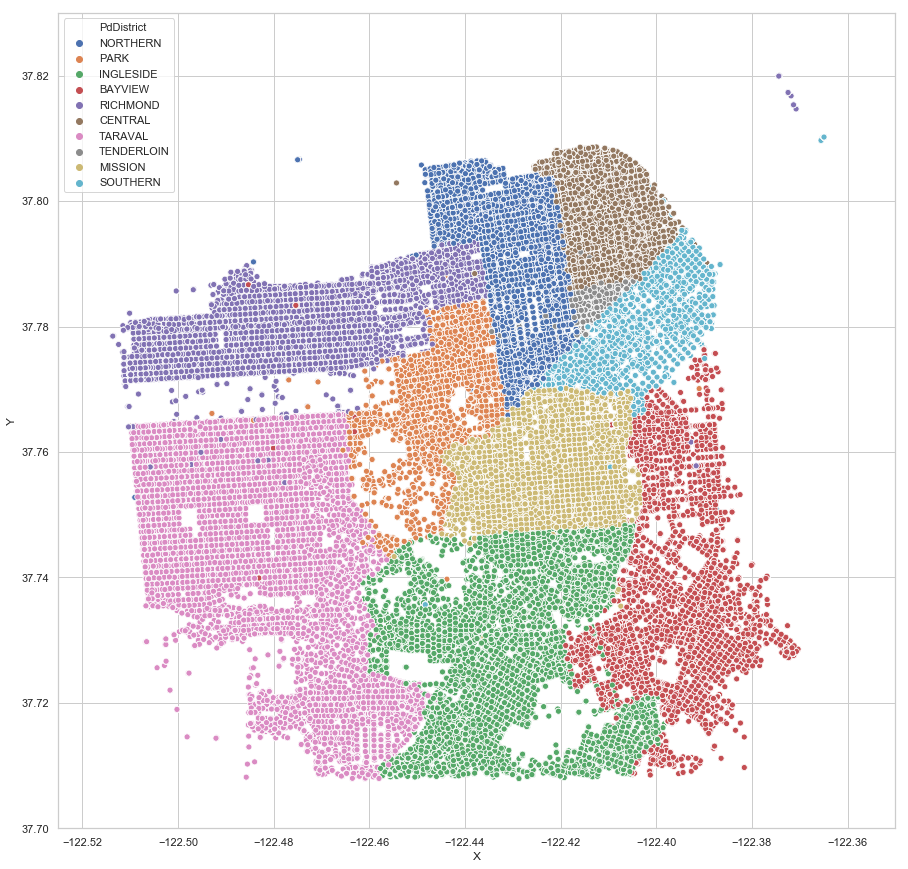

In [131]:
# 관할 서별 지역 탐색...
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot("X", "Y", data=df_train, hue="PdDistrict", alpha=1)
plt.xlim([-122.525, -122.35])
plt.ylim([37.7, 37.83]) 

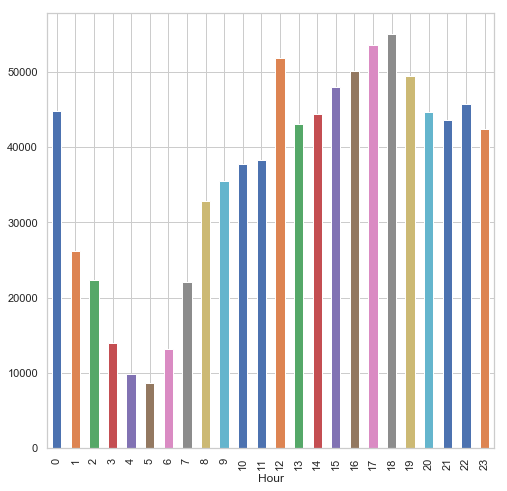

In [121]:
# 시간에 따른 범죄 탐색...
df_by_Hour = df_train[["Hour", "Category", "X"]]
df_by_Hour = df_by_Hour.pivot_table(index="Category", columns="Hour", values="X", aggfunc="count", fill_value=0, margins=True)
df_by_Hour.iloc[-1, :-1].plot("bar", figsize=(8,8))

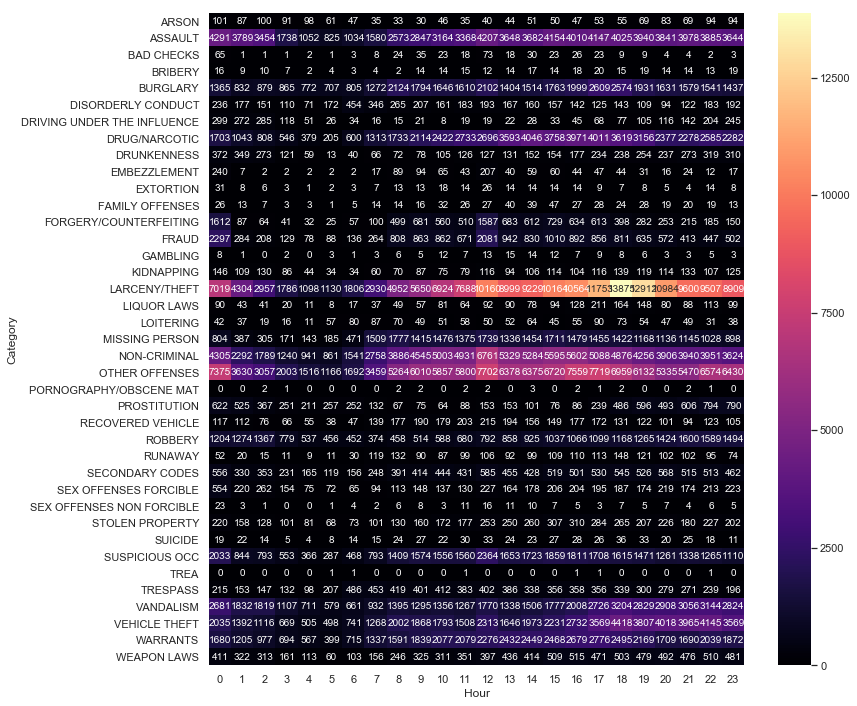

In [108]:
# 시간변화에 따른 범죄수 탐색...
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_by_Hour, cmap="magma", annot=True, fmt="")

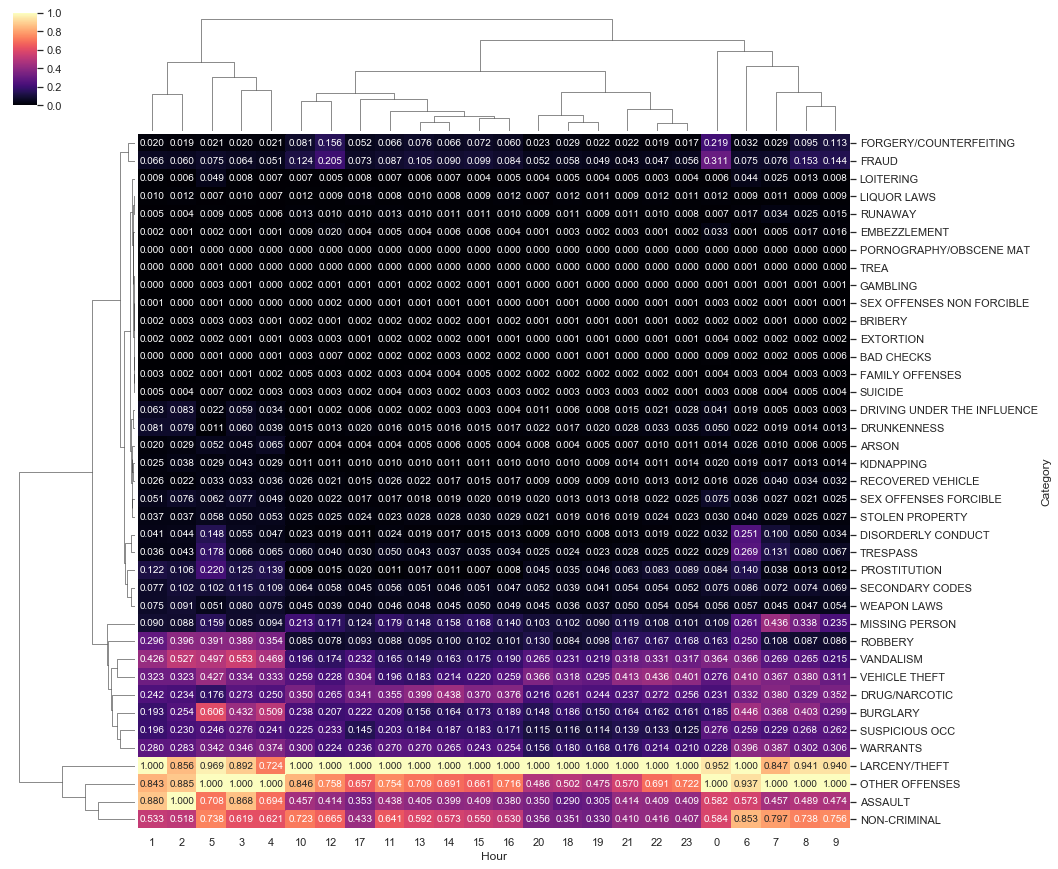

In [112]:
# 시간변화에 따른 범죄 탐색, 클러스터링...
sns.clustermap(df_by_Hour, cmap="magma", annot=True, standard_scale=True, figsize=(15, 15), fmt=".3f")

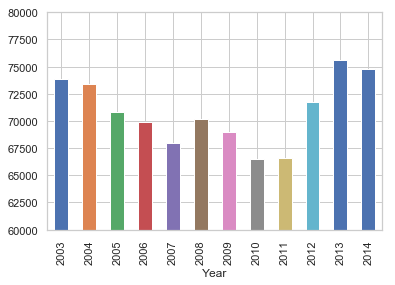

In [128]:
# 연도별 범죄 탐색...
df_by_Year = df_train[["Year", "Category", "X"]]
df_by_Year = df_by_Year.pivot_table(index="Category", columns="Year", values="X", aggfunc="count", fill_value=0, margins=True)
df_by_Year.iloc[-1, :-2].plot("bar", ylim=(60000,80000))

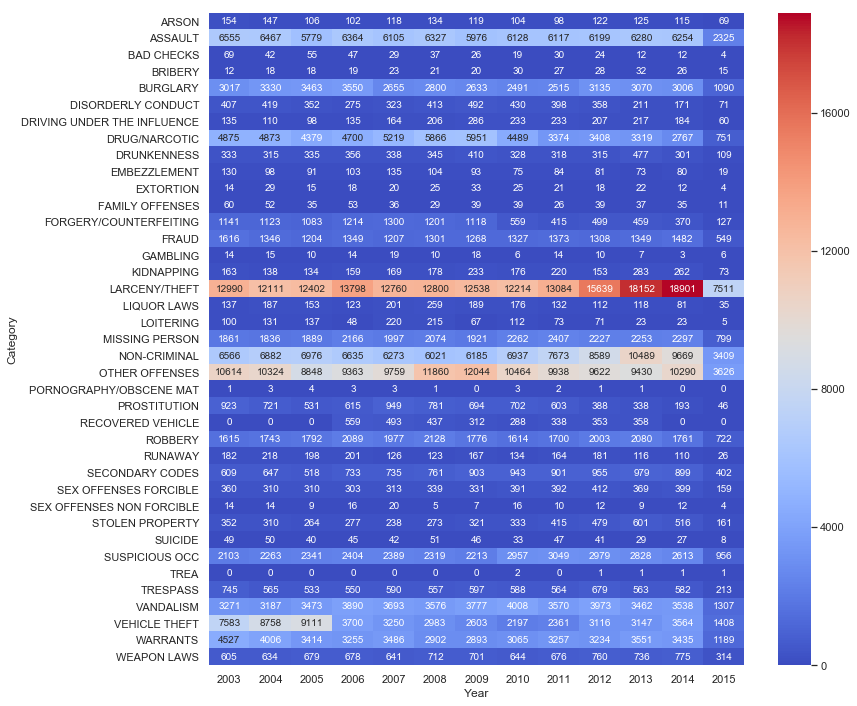

In [98]:
# 연도별 히트맵...
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_by_Year, cmap="coolwarm", annot=True, fmt="")

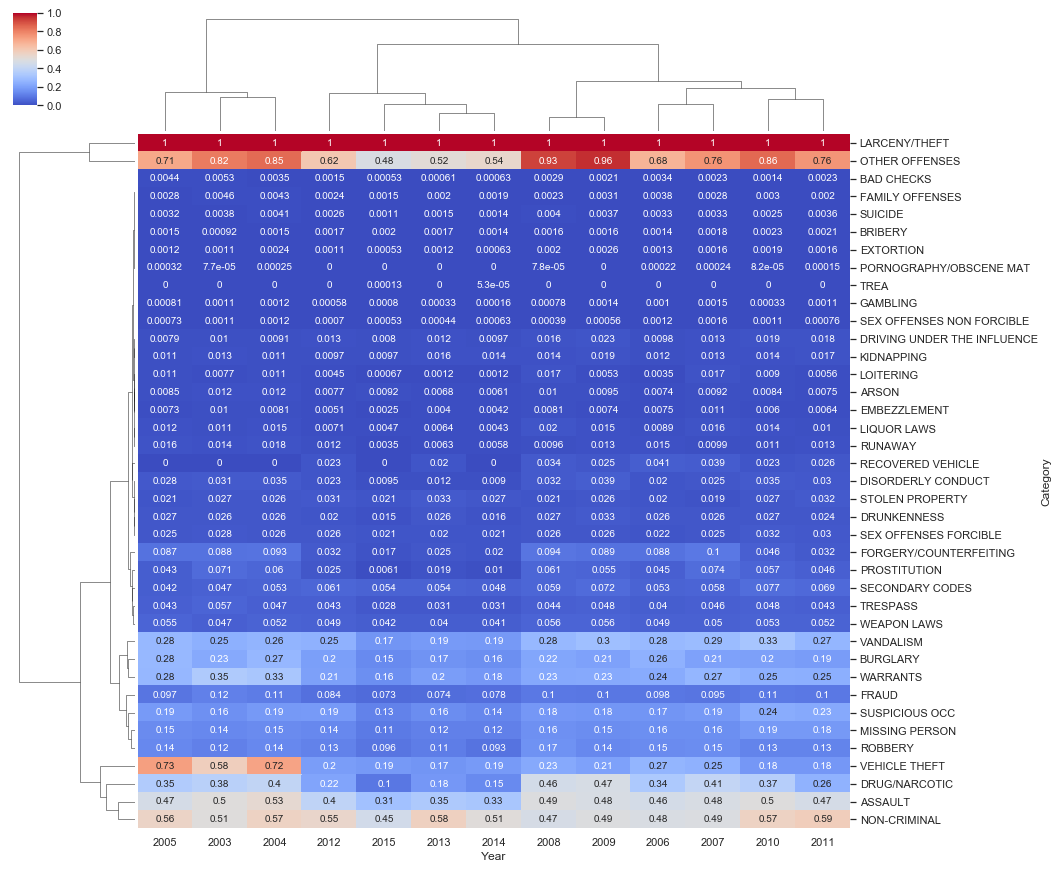

In [99]:
# 연도별 클러스터링...
sns.clustermap(df_by_Year, cmap="coolwarm", annot=True, standard_scale=True, figsize=(15, 15))

In [81]:
# 요일별 범죄 탐색...
df_by_day = df_train[["DayOfWeek", "Category", "X"]]
df_by_day = df_by_day.pivot_table(index="Category", columns="DayOfWeek", values="X", aggfunc="count", fill_value=0)
df_by_day

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ARSON,220,228,220,211,199,235,200
ASSAULT,11160,10560,11995,12082,10246,10280,10553
BAD CHECKS,62,66,45,20,66,76,71
BRIBERY,49,41,42,41,39,37,40
BURGLARY,6327,5262,4754,4231,5350,5374,5457
DISORDERLY CONDUCT,541,608,624,586,644,657,660
DRIVING UNDER THE INFLUENCE,352,263,457,442,282,251,221
DRUG/NARCOTIC,7420,7823,6390,6143,8454,8474,9267
DRUNKENNESS,622,513,833,813,496,461,542


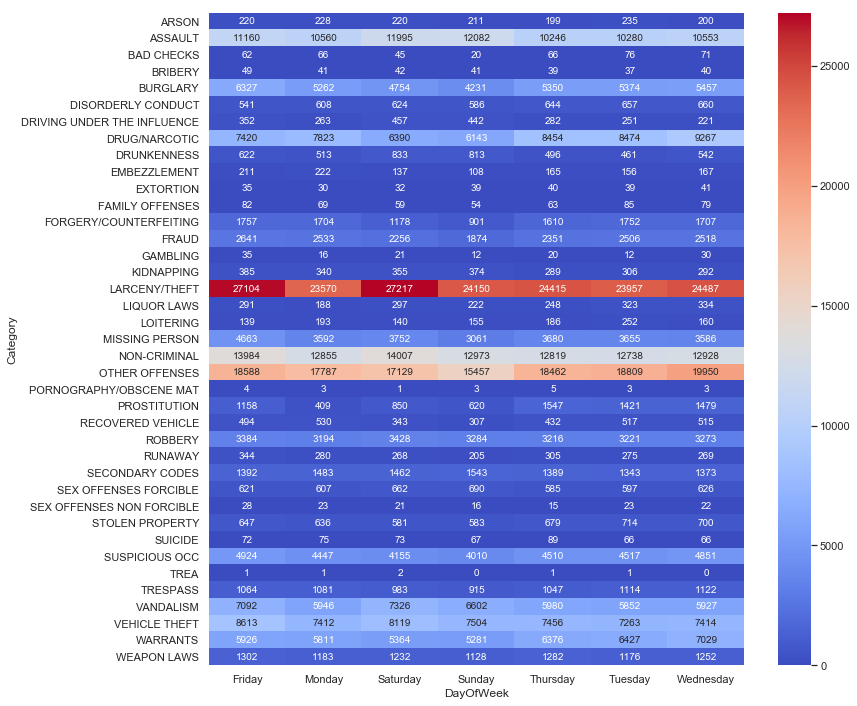

In [90]:
# 요일별 히트맵...
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_by_day, cmap="coolwarm", annot=True, fmt="")

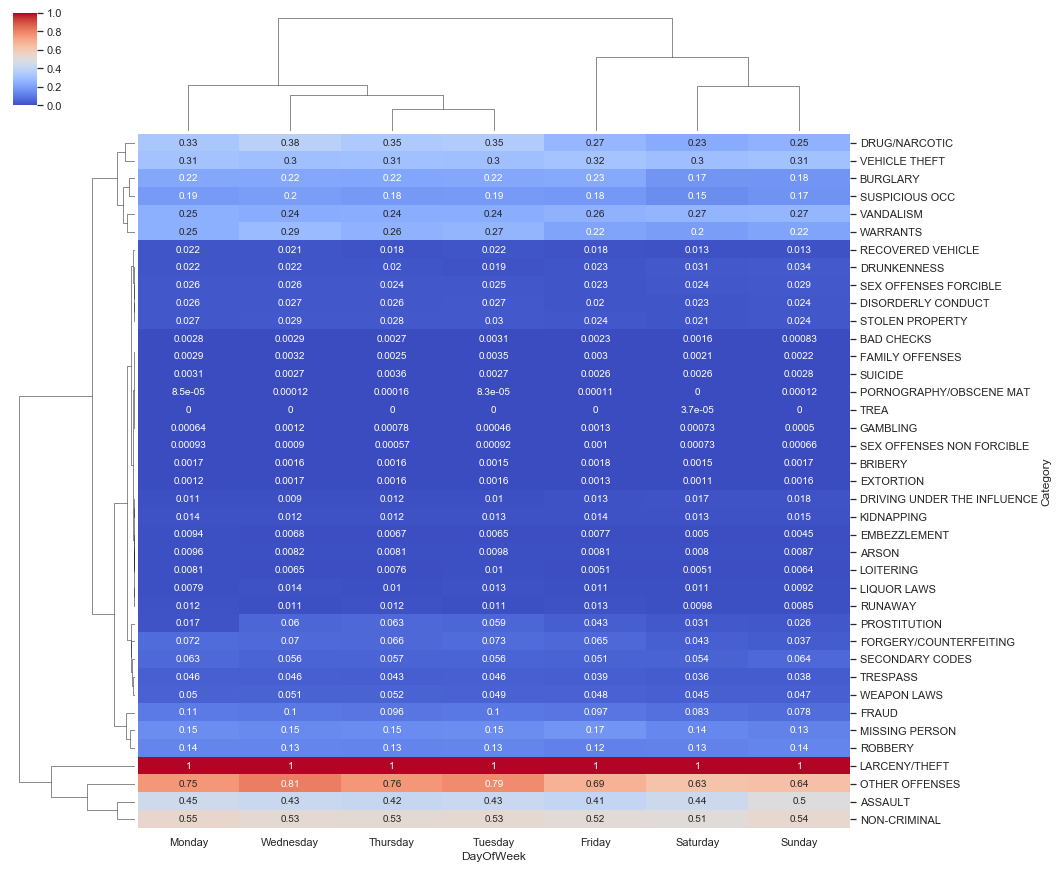

In [84]:
# 요일별 클러스터링...
sns.clustermap(df_by_day, cmap="coolwarm", annot=True, standard_scale=True, figsize=(15, 15))

In [94]:
# 관할서별 탐색...
df_by_District = df_train[["PdDistrict", "Category", "X"]]
df_by_District = df_by_District.pivot_table(index="Category", columns="PdDistrict", values="X", aggfunc="count", fill_value=0)
df_by_District

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ARSON,393,111,182,145,149,65,103,185,120,60
ASSAULT,9857,6977,8533,11149,8318,3515,3202,12183,5463,7679
BAD CHECKS,34,65,32,46,54,15,31,74,36,19
BRIBERY,56,12,53,66,18,7,8,37,17,15
BURGLARY,3930,4519,3331,3745,5854,2888,2696,4841,3463,1488
DISORDERLY CONDUCT,219,494,171,1099,452,271,108,511,162,833
DRIVING UNDER THE INFLUENCE,179,160,206,357,260,176,319,306,202,103
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
DRUNKENNESS,243,517,190,782,368,374,149,959,259,439


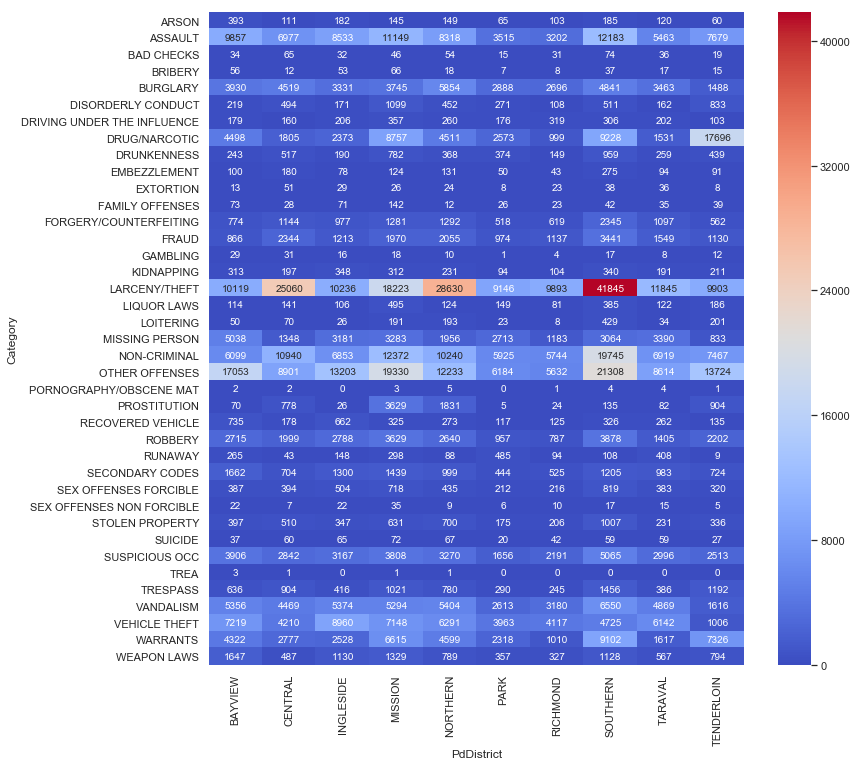

In [95]:
# 관할 서별 히트맵... 
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_by_District, cmap="coolwarm", annot=True, fmt="")

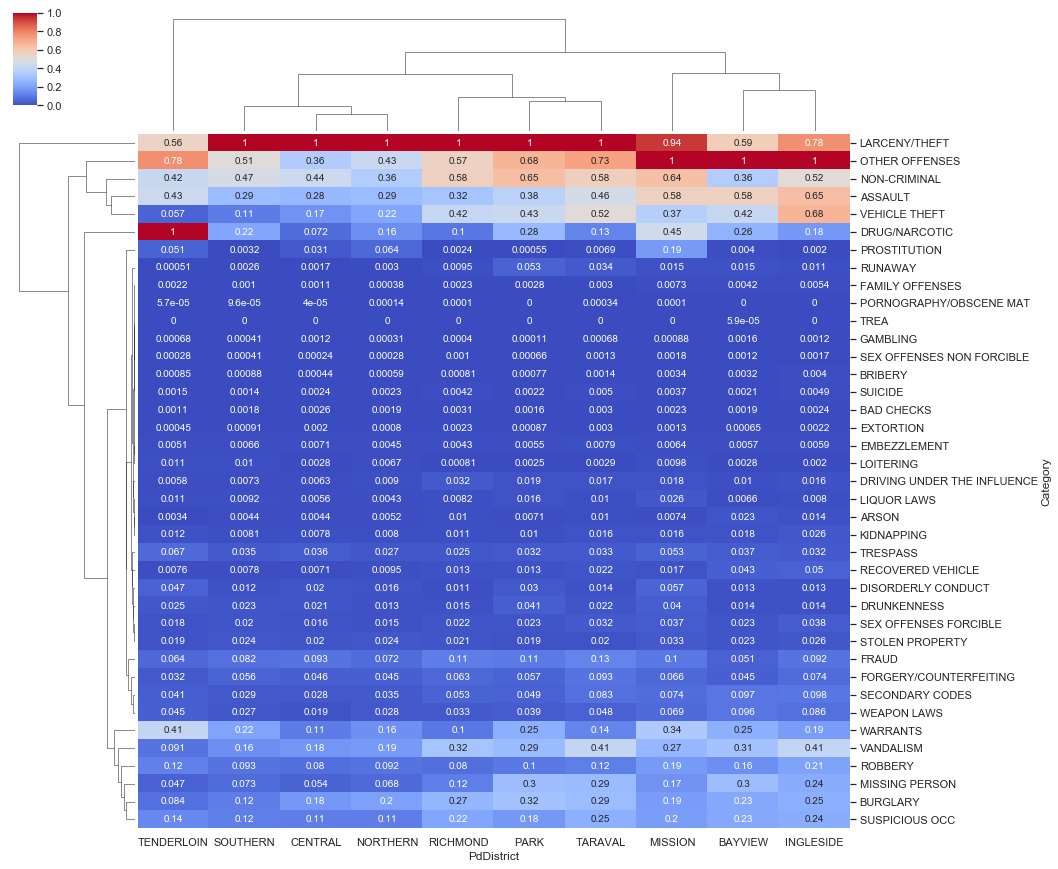

In [66]:
# 관할 서별 클러스터링...
sns.clustermap(df_by_District, cmap="coolwarm", annot=True, standard_scale=True, figsize=(15, 15))